<a href="https://colab.research.google.com/github/ChristianIES/Redes_Neuronales/blob/main/RN_Tarea_2_Noviembre_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 2: Redes Neuronales, Doctorado en Estadística

### Estudiantes: Valentina Bastidas, Christian Araya
### Profesor: Rodrigo Salas

1.- Toolbox para el desarrollo de la actividad:

In [139]:
import os
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D


In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

In [142]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

In [143]:
from sklearn import metrics

2.- Importación de archivos y preparación de las imágenes para la implementación de modelos:

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
directorio = '/content/drive/MyDrive/Colab Notebooks/rps-cv-images'
rock = os.path.join(directorio,'rock')
paper = os.path.join(directorio,'paper')
scissors = os.path.join(directorio,'scissors')

In [147]:
print('Data from Scissors Directory')
print(os.listdir(scissors))

Data from Scissors Directory
['533ZH0WCaiOZO0nL.png', '3dI7E5pwR07mvKvF.png', '2vDaPrc35RGC8nvM.png', '5EUrUn1fjmi3TKE3.png', '1yDUM1w2HTbuPIfO.png', '2C9FEbBklwcVhF3W.png', '63khvkT3L0GCdMHh.png', '138Tx9KlEfheT3uB.png', '2fxAdPTgrVIoITsL.png', '65PVbRzrpzfdu8nJ.png', '2gd0aqAxW55bHZP9.png', '3kVoftgTNdDcvPPY.png', '0CSaM2vL2cWX6Cay.png', '44Hu6owS3pPqmyG1.png', '2ZPcSpOm7SEfQYwg.png', '1vQCX4af6hQmuwxZ.png', '4E0THAnIciVeLK79.png', '2tRxoWcFfrvjsHTZ.png', '2EeIeEe1P0a0Fi9v.png', '2M8LvUBGMOH1bsaz.png', '3n4i3lKB3nZOpDVv.png', '4X8TOCQTfCWnMfm2.png', '2DEYFsJ27UgVqv3W.png', '5CzwWCDnxKOJz5T0.png', '2l1K148aIJHRR1q7.png', '5mipmm4t8RM5o0tW.png', '5QHP8zydBsbWyt4T.png', '2V5E7uHmAh9eK0qt.png', '1L1n6plr7jlZGirw.png', '0Ug54ifXRqqlZS2Z.png', '56VICUKU6RgoLTHW.png', '4Zh2kADxqxEsPTrX.png', '277q9TUTAsBAbTCj.png', '2ufDQYIqKG1xRG7y.png', '5p5Qjz4unC0KcWoL.png', '1UojLz4CrT2G1Eo5.png', '64ktckSF0c26K6AY.png', '1CXgK9fgGdSRggD9.png', '1VRzspyXpQ6A2rKy.png', '2J7q0JbqJrjmZC05.png', '1lEpWTJDp

In [148]:
rock_carga = os.listdir(rock)


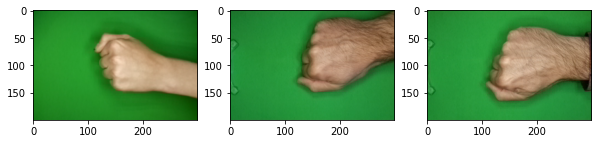

In [149]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(rock_carga[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(rock, img_path))
    plt.imshow(img)
plt.show()

In [150]:
paper_carga = os.listdir(paper)

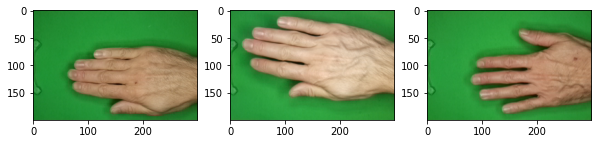

In [151]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(paper_carga[2:5]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(paper, img_path))
    plt.imshow(img)
plt.show()

In [152]:
scissors_carga = os.listdir(scissors)

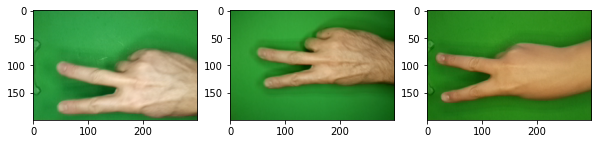

In [153]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(scissors_carga[10:13]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(scissors, img_path))
    plt.imshow(img)
plt.show()

In [154]:


def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [155]:
labels = ['paper','scissors','rock']
nb = len(labels)
X, y = input_target_split(directorio,labels)

Completed: rock

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([536, 572, 532])) (array([0, 1, 2]), array([176, 177, 194]))


In [157]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [158]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

3.- Implementación de una CNN:

In [159]:
modelo = Sequential()
modelo.add(Conv2D(8, (3,3), input_shape=(150,150,3), activation='relu'))
modelo.add(MaxPooling2D(2,2))
modelo.add(Conv2D(16, (3, 3), activation = 'relu'))
modelo.add(MaxPooling2D(2, 2))
modelo.add(Flatten())
modelo.add(Dense(units=256, activation='relu'))
modelo.add(Dense(units=3, activation='softmax'))

In [160]:
filepath= "modelo_cnn_final.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='loss',patience=10,min_delta=0.001,restore_best_weights=True)

callbacks_list = [checkpoint,early_stopping]

In [161]:
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.metrics.AUC()])

In [162]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               5308672   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [163]:
hist = modelo.fit(X_train,y_train,epochs=30,callbacks=callbacks_list)

Epoch 1/30
52/52 [==============================] - 2s 18ms/step - loss: 0.9344 - accuracy: 0.6756 - auc_5: 0.6707


Epoch 2/30
52/52 [==============================] - 1s 16ms/step - loss: 0.4293 - accuracy: 0.8585 - auc_5: 0.8556


Epoch 3/30
52/52 [==============================] - 1s 16ms/step - loss: 0.3169 - accuracy: 0.9000 - auc_5: 0.9068


Epoch 4/30
52/52 [==============================] - 1s 16ms/step - loss: 0.2010 - accuracy: 0.9348 - auc_5: 0.9350


Epoch 5/30
52/52 [==============================] - 1s 16ms/step - loss: 0.1123 - accuracy: 0.9707 - auc_5: 0.9524


Epoch 6/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0582 - accuracy: 0.9841 - auc_5: 0.9650


Epoch 7/30
52/52 [==============================] - 1s 17ms/step - loss: 0.0486 - accuracy: 0.9854 - auc_5: 0.9734


Epoch 8/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0223 - accuracy: 0.9933 - auc_5: 0.9791


Epoch 9/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0105 - accuracy: 0.9994 - auc_5: 0.9833


Epoch 10/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0053 - accuracy: 1.0000 - auc_5: 0.9864


Epoch 11/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0032 - accuracy: 1.0000 - auc_5: 0.9887


Epoch 12/30
52/52 [==============================] - 1s 17ms/step - loss: 0.0019 - accuracy: 1.0000 - auc_5: 0.9905


Epoch 13/30
52/52 [==============================] - 1s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - auc_5: 0.9919


Epoch 14/30
52/52 [==============================] - 1s 17ms/step - loss: 0.0010 - accuracy: 1.0000 - auc_5: 0.9930


Epoch 15/30
52/52 [==============================] - 1s 16ms/step - loss: 8.3835e-04 - accuracy: 1.0000 - auc_5: 0.9938


Epoch 16/30
52/52 [==============================] - 1s 16ms/step - loss: 7.4472e-04 - accuracy: 1.0000 - auc_5: 0.9946


Epoch 17/30
52/52 [==============================] - 1s 16ms/step - loss: 5.7892e-04 - accuracy: 1.0000 - auc_5: 0.9952


Epoch 18/30
52/52 [==============================] - 1s 17ms/step - loss: 5.0251e-04 - accuracy: 1.0000 - auc_5: 0.9956


Epoch 19/30
52/52 [==============================] - 1s 17ms/step - loss: 4.3853e-04 - accuracy: 1.0000 - auc_5: 0.9961


Epoch 20/30
52/52 [==============================] - 1s 16ms/step - loss: 4.0444e-04 - accuracy: 1.0000 - auc_5: 0.9964


Epoch 21/30
52/52 [==============================] - 1s 16ms/step - loss: 3.6252e-04 - accuracy: 1.0000 - auc_5: 0.9967


Epoch 22/30
52/52 [==============================] - 1s 16ms/step - loss: 3.0821e-04 - accuracy: 1.0000 - auc_5: 0.9970


Epoch 23/30
52/52 [==============================] - 1s 16ms/step - loss: 2.7519e-04 - accuracy: 1.0000 - auc_5: 0.9972


Epoch 24/30
52/52 [==============================] - 1s 16ms/step - loss: 2.5454e-04 - accuracy: 1.0000 - auc_5: 0.9975


Epoch 25/30
52/52 [==============================] - 1s 17ms/step - loss: 2.2677e-04 - accuracy: 1.0000 - auc_5: 0.9976


In [164]:
#modelo_guardado = tf.keras.models.load_model('modelo_cnn_final.h5')
modelo.save("modelo_cnn_final.h5")

4.- Predicción con el modelo CNN:

In [165]:
from keras.models import load_model
modelo_guardado = load_model('modelo_cnn_final.h5')
y_pred = modelo_guardado.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

18/18 [==============================] - 0s 6ms/step
[0 2 2 0 1 0 1 2 2 0 2 0 2 2 2 0 2 0 2 1 1 2 1 1 0 1 2 0 1 2 1 0 1 0 1 2 0
 0 0 0 0 0 2 2 0 1 1 0 1 1 0 1 0 0 0 1 1 0 2 0 2 2 0 0 2 1 2 1 1 2 2 0 0 0
 1 2 0 1 0 2 1 1 1 1 2 1 2 2 0 2 0 0 2 2 0 2 1 2 1 1 0 2 2 1 2 1 0 0 2 1 0
 1 0 0 1 0 2 2 2 2 0 0 2 0 2 1 2 0 2 1 1 0 2 0 1 1 2 1 0 0 2 1 2 2 2 1 1 0
 2 1 1 1 0 2 1 0 0 2 1 2 1 0 0 2 0 0 1 0 2 2 0 1 0 2 1 1 0 2 0 1 0 1 1 1 1
 1 0 2 2 2 2 2 2 2 2 1 2 2 0 0 0 0 2 1 1 1 0 2 0 2 1 1 1 1 1 0 0 2 2 2 1 2
 1 0 2 0 2 2 0 1 0 0 0 2 0 2 0 0 1 1 1 1 2 2 1 2 2 0 0 1 0 2 0 2 2 1 1 1 2
 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 1 0 2 0 0 2 1 1 1 2 0 2 1 1 2 0 2 2 0 0 1 1
 2 1 0 1 1 1 2 0 2 0 0 1 2 1 0 1 1 0 1 1 2 2 0 1 2 2 2 2 1 2 2 1 1 2 1 2 0
 1 2 2 0 0 0 1 2 1 2 0 2 0 1 1 2 0 2 1 1 2 1 1 0 2 1 2 0 2 2 0 1 1 0 2 2 1
 1 1 0 1 2 1 0 1 2 2 1 0 0 1 1 1 1 2 0 0 2 2 2 0 0 0 0 2 1 2 2 2 1 0 2 0 2
 1 2 0 2 2 2 0 0 1 2 1 2 1 0 2 2 1 1 2 1 0 0 1 1 2 1 1 0 2 2 0 2 1 0 1 1 2
 0 2 0 2 0 0 0 0 2 0 0 2 0 1 0 2 2 1 0 2 0 1 2 

In [166]:
ground = np.argmax(y_test,axis=1)

5.- Métricas de desempeño de modelo CNN implementado, sobre conjunto de test:

In [167]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))
predCNN=pred

              precision    recall  f1-score   support

       paper       0.95      0.93      0.94       176
    scissors       0.96      0.97      0.96       177
        rock       0.97      0.97      0.97       194

    accuracy                           0.96       547
   macro avg       0.96      0.96      0.96       547
weighted avg       0.96      0.96      0.96       547



In [96]:
#AUC = hist.history['auc_2']
#epochs = range(1, len(AUC) + 1)

In [94]:
#plt.plot(epochs, AUC, 'g', label='AUC')
#plt.xlabel('No.of epochs')
#plt.ylabel('AUC')
#plt.title('Training AUC')
#plt.legend()
#plt.figure()

In [97]:
#print(hist.history)

6.- Implementación de redes MobileNetV2, ResNet50, VGG16, DenseNet121 (sin pesos pre-entrenados):

In [168]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1640, 150, 150, 3)
(547, 150, 150, 3)
(1640, 3)
(547, 3)


In [183]:
model2 = tf.keras.applications.InceptionV3(input_shape=(150,150,3),include_top=False,pooling='avg')
model3 = tf.keras.applications.ResNet50(input_shape=(150,150,3),include_top=False,pooling='avg')
model4 = tf.keras.applications.VGG16(input_shape=(150,150,3),include_top=False,pooling='avg')
model5 = tf.keras.applications.DenseNet121(input_shape=(150,150,3),include_top=False,pooling='avg')

In [184]:
input2 = model2.input
input3 = model3.input
input4 = model4.input
input5 = model5.input

In [185]:
x2 = tf.keras.layers.Dense(128, activation='relu')(model2.output)
outputs2 = tf.keras.layers.Dense(3, activation='softmax')(x2)
x3 = tf.keras.layers.Dense(128, activation='relu')(model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
x4 = tf.keras.layers.Dense(128, activation='relu')(model4.output)
outputs4 = tf.keras.layers.Dense(3, activation='softmax')(x4)
x5 = tf.keras.layers.Dense(128, activation='relu')(model5.output)
outputs5 = tf.keras.layers.Dense(3, activation='softmax')(x5)


In [186]:

model2 = tf.keras.Model(inputs=input2, outputs=outputs2)
model3 = tf.keras.Model(inputs=input3, outputs=outputs3)
model4 = tf.keras.Model(inputs=input4, outputs=outputs4)
model5 = tf.keras.Model(inputs=input5, outputs=outputs5)


In [175]:
model2.summary()



Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [176]:
model3.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [177]:
model4.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0  

In [178]:
model5.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 156, 156, 3)  0          ['input_16[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d_6[0][0]']       
                                                                                           

In [179]:
model5.count_params()

7169091

In [187]:
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
ev2=model2.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev3=model3.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev4=model4.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev5=model5.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)


In [190]:
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)
y_pred5=model5.predict(X_test)

pred2=np.argmax(y_pred2,axis=1)
pred3=np.argmax(y_pred3,axis=1)
pred4=np.argmax(y_pred4,axis=1)
pred5=np.argmax(y_pred5,axis=1)

ground = np.argmax(y_test,axis=1)


18/18 [==============================] - 1s 47ms/step


6.- Métricas de desempeño de modelos InceptionV3, ResNet50, VGG16, DenseNet121:

* InceptionV3:

In [191]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       176
           1       1.00      0.89      0.94       177
           2       0.99      1.00      1.00       194

    accuracy                           0.96       547
   macro avg       0.96      0.96      0.96       547
weighted avg       0.97      0.96      0.96       547



* ResNet50:

In [192]:
print(classification_report(ground,pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       176
           1       0.99      0.96      0.98       177
           2       0.98      0.99      0.99       194

    accuracy                           0.98       547
   macro avg       0.98      0.98      0.98       547
weighted avg       0.98      0.98      0.98       547



* VGG16:

In [193]:
print(classification_report(ground,pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       176
           1       0.99      0.98      0.99       177
           2       0.99      1.00      1.00       194

    accuracy                           0.99       547
   macro avg       0.99      0.99      0.99       547
weighted avg       0.99      0.99      0.99       547



* DenseNet121:

In [194]:
print(classification_report(ground,pred5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       176
           1       1.00      0.99      1.00       177
           2       0.99      1.00      1.00       194

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547



7.- Modelos InceptionV3, ResNet50, VGG16, DenseNet121 con pesos pre-entrenados:

In [201]:
model8 = tf.keras.applications.InceptionV3(input_shape=(150,150,3),weights='imagenet',include_top=False,pooling='avg')
model9 = tf.keras.applications.ResNet50(input_shape=(150,150,3),weights='imagenet',include_top=False,pooling='avg')
model10 = tf.keras.applications.VGG16(input_shape=(150,150,3),weights='imagenet',include_top=False,pooling='avg')
model11 = tf.keras.applications.DenseNet121(input_shape=(150,150,3),weights='imagenet',include_top=False,pooling='avg')


In [202]:
model8.trainable = False
model9.trainable = False
model10.trainable = False
model11.trainable = False


In [203]:
input8 = model8.input
input9 = model9.input
input10 = model10.input
input11 = model11.input


In [204]:
x8 = tf.keras.layers.Dense(128, activation='relu')(model8.output)
output8 = tf.keras.layers.Dense(3, activation='softmax')(x8)
x9 = tf.keras.layers.Dense(128, activation='relu')(model9.output)
output9 = tf.keras.layers.Dense(3, activation='softmax')(x9)
x10 = tf.keras.layers.Dense(128, activation='relu')(model10.output)
output10 = tf.keras.layers.Dense(3, activation='softmax')(x10)
x11 = tf.keras.layers.Dense(128, activation='relu')(model11.output)
output11 = tf.keras.layers.Dense(3, activation='softmax')(x11)


model8 = tf.keras.Model(inputs=input8, outputs=output8)
model9= tf.keras.Model(inputs=input9, outputs=output9)
model10 = tf.keras.Model(inputs=input10, outputs=output10)
model11 = tf.keras.Model(inputs=input11, outputs=output11)


In [199]:
model8.summary()
model9.summary()
model10.summary()
model11.summary()


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_25[0][0]']               
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [200]:
model8.count_params()
model9.count_params()
model10.count_params()
model11.count_params()

7169091

In [205]:
model8.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model9.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model10.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [206]:
ev8=model8.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev9=model9.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev10=model10.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)
ev11=model11.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=20)


Epoch 1/20
52/52 [==============================] - 15s 213ms/step - loss: 0.4291 - accuracy: 0.8549 - val_loss: 0.0793 - val_accuracy: 0.9799
Epoch 2/20
52/52 [==============================] - 10s 184ms/step - loss: 0.1432 - accuracy: 0.9494 - val_loss: 0.0650 - val_accuracy: 0.9817
Epoch 3/20
52/52 [==============================] - 10s 194ms/step - loss: 0.1364 - accuracy: 0.9482 - val_loss: 0.0553 - val_accuracy: 0.9799
Epoch 4/20
52/52 [==============================] - 10s 185ms/step - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 5/20
52/52 [==============================] - 9s 182ms/step - loss: 0.0806 - accuracy: 0.9768 - val_loss: 0.0381 - val_accuracy: 0.9854
Epoch 6/20
52/52 [==============================] - 9s 182ms/step - loss: 0.1098 - accuracy: 0.9646 - val_loss: 0.0398 - val_accuracy: 0.9799
Epoch 7/20
52/52 [==============================] - 9s 181ms/step - loss: 0.0698 - accuracy: 0.9750 - val_loss: 0.0230 - val_accuracy: 0.9945
Ep

8.- Predicción con modelos InceptionV3, ResNet50, VGG16 y DenseNet121, con pesos pre-entrenados:

In [207]:
y_pred8=model8.predict(X_test)
y_pred9=model9.predict(X_test)
y_pred10=model10.predict(X_test)
y_pred11=model11.predict(X_test)


pred8=np.argmax(y_pred8,axis=1)
pred9=np.argmax(y_pred9,axis=1)
pred10=np.argmax(y_pred10,axis=1)
pred11=np.argmax(y_pred11,axis=1)


ground = np.argmax(y_test,axis=1)


18/18 [==============================] - 3s 52ms/step


9.- Métricas de desempeño:

* InceptionV3:

In [210]:
print(classification_report(ground,pred8))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       176
           1       0.99      0.99      0.99       177
           2       0.98      1.00      0.99       194

    accuracy                           0.99       547
   macro avg       0.99      0.99      0.99       547
weighted avg       0.99      0.99      0.99       547



* ResNet50:

In [211]:
print(classification_report(ground,pred9))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70       176
           1       0.87      0.39      0.54       177
           2       0.85      0.97      0.91       194

    accuracy                           0.74       547
   macro avg       0.78      0.73      0.72       547
weighted avg       0.78      0.74      0.72       547



* VGG16:

In [212]:
print(classification_report(ground,pred10))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       176
           1       1.00      1.00      1.00       177
           2       0.99      1.00      1.00       194

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547



* DenseNet121:

In [213]:
print(classification_report(ground,pred11))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       176
           1       1.00      0.99      1.00       177
           2       1.00      0.99      1.00       194

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547



10.- Comparación de los modelos implementados:

In [59]:
#AUC_prueba = ev8.history['auc']

In [214]:
#AUC y curva ROC:

from sklearn.metrics import roc_auc_score
ground = np.argmax(y_test,axis=1)
xCNN, yCNN, thresholdsCNN = metrics.roc_curve(ground, predCNN, pos_label=2)
xm2, ym2, thresholdsm2 = metrics.roc_curve(ground, pred2, pos_label=2)
xm3, ym3, thresholdsm3 = metrics.roc_curve(ground, pred3, pos_label=2)
xm4, ym4, thresholdsm4 = metrics.roc_curve(ground, pred4, pos_label=2)
xm5, ym5, thresholdsm5 = metrics.roc_curve(ground, pred5, pos_label=2)
xm8, ym8, thresholdsm8 = metrics.roc_curve(ground, pred8, pos_label=2)
xm9, ym9, thresholdsm9 = metrics.roc_curve(ground, pred9, pos_label=2)
xm10, ym10, thresholdsm10 = metrics.roc_curve(ground, pred10, pos_label=2)
xm11, ym11, thresholdsm11 = metrics.roc_curve(ground, pred11, pos_label=2)

aucCNN=metrics.auc(xCNN, yCNN)
aucm2=metrics.auc(xm2, ym2)
aucm3=metrics.auc(xm3, ym3)
aucm4=metrics.auc(xm4, ym4)
aucm5=metrics.auc(xm5, ym5)
aucm8=metrics.auc(xm8, ym8)
aucm9=metrics.auc(xm9, ym9)
aucm10=metrics.auc(xm10, ym10)
aucm11=metrics.auc(xm11, ym11)

#print(aucCNN)


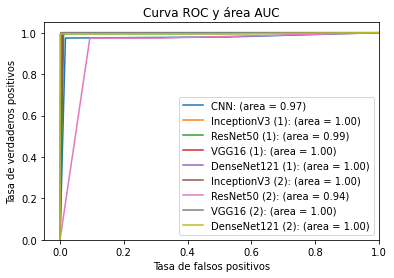

In [215]:
plt.figure()

# CNN
plt.plot(xCNN, yCNN, label='CNN: (area = %0.2f)' % aucCNN)

# Sin pesos pre-entrenados:
plt.plot(xm2, ym2, label='InceptionV3 (1): (area = %0.2f)' % aucm2)
plt.plot(xm3, ym3, label='ResNet50 (1): (area = %0.2f)' % aucm3)
plt.plot(xm4, ym4, label='VGG16 (1): (area = %0.2f)' % aucm4)
plt.plot(xm5, ym5, label='DenseNet121 (1): (area = %0.2f)' % aucm5)

# Con pesos pre-entrenados:
plt.plot(xm8, ym8, label='InceptionV3 (2): (area = %0.2f)' % aucm8)
plt.plot(xm9, ym9, label='ResNet50 (2): (area = %0.2f)' % aucm9)
plt.plot(xm10, ym10, label='VGG16 (2): (area = %0.2f)' % aucm10)
plt.plot(xm11, ym11, label='DenseNet121 (2): (area = %0.2f)' % aucm11)


plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC y área AUC')
plt.legend(loc="lower right")
plt.show()

Como se puede observar en el gráfico, casi la totalidad de los modelos presenta una curva ROC muy similar, evidenciando un destacado desempeño en la tarea de clasificar (con múltiples categorías).

Los modelos con (1) representan a la implementación sin pesos pre-entrenados según ImageNet, de acuerdo con las instrucciones, mientras que (2) lo contrario. En este contexto, se puede apreciar que ResNet50 (línea rosada) empeora su desempeño al utilizar pesos pre-entrenados. Sin embargo, su AUC es de 0.94.

In [216]:
# Tabla comparativa
from tabulate import tabulate
data = [["CNN","--","5.310.835","0.98"],
["InceptionV3","Sin pesos pre-entrenados","22.065.443","0.96"],
["ResNet50","Sin pesos pre-entrenados","23.850.371","0.98"],
["VGG16","Sin pesos pre-entrenados","14.780.739","0.99"],
["DenseNet121","Sin pesos pre-entrenados","7.169.091","1.00"],
["ResNet50","Sin pesos pre-entrenados","23.850.371","0.98"],
["InceptionV3","Con pesos pre-entrenados","262.659 entrenables","0.99"],
["ResNet50","Con pesos pre-entrenados","262.659 entrenables","0.74"],
["VGG16","Con pesos pre-entrenados","66.051","1.00"],
["DenseNet121","Con pesos pre-entrenados","131.581","1.00"]
]
print (tabulate(data, headers=["Modelo", "Pesos pre-entrenados ImageNet", "Parámetros", "Accuracy"]))

Modelo       Pesos pre-entrenados ImageNet    Parámetros             Accuracy
-----------  -------------------------------  -------------------  ----------
CNN          --                               5.310.835                  0.98
InceptionV3  Sin pesos pre-entrenados         22.065.443                 0.96
ResNet50     Sin pesos pre-entrenados         23.850.371                 0.98
VGG16        Sin pesos pre-entrenados         14.780.739                 0.99
DenseNet121  Sin pesos pre-entrenados         7.169.091                  1
ResNet50     Sin pesos pre-entrenados         23.850.371                 0.98
InceptionV3  Con pesos pre-entrenados         262.659 entrenables        0.99
ResNet50     Con pesos pre-entrenados         262.659 entrenables        0.74
VGG16        Con pesos pre-entrenados         66.051                     1
DenseNet121  Con pesos pre-entrenados         131.581                    1


Como se puede apreciar, a través de la métrica accuracy, la mayoría de los modelos logran desempeños destacados en la tarea de clasificar. En particular, se debe notar que no existe evidencia que soporte la noción que a mayor cantidad de parámetros, se logre un porcentaje de accuracy más elevado. Prueba de esto es el modelo CNN, que supera a InceptionV3 sin pesos pre-entrenados.

Por otro lado, el uso de pesos pre-entrenados ImageNet mejora en general el índice de precisión capturado en esta tabla, con la excepción de la red ResNet50, que evidencia una disminución en la tasa correcta de clasificación.

Cabe señalar que todas las evaluaciones se desarrollaron sobre el mismo conjunto de test.